# Data Exploration
Objetivo: Exploración y análisis inicial del dataset HAGRID para el proyecto de reconocimiento de señales de ayuda.

## 1. Introducción y objetivo
- Breve descripción del propósito del análisis exploratorio
- Objetivos específicos de la exploración

## 2. Verificación y descarga de datos
- Comprobar la existencia de las carpetas y archivos necesarios
- Descargar y descomprimir el dataset y las anotaciones si es necesario

In [17]:
import os
import requests
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt

# Verificar que la carpeta ../data existe
if not os.path.exists('../data'):
    os.makedirs('../data', exist_ok=True)

# Definir rutas y URLs
hagrid_url = 'https://rndml-team-cv.obs.ru-moscow-1.hc.sbercloud.ru/datasets/hagrid_v2/hagridv2_512.zip'
hagrid_zip = '../data/hagridv2_512.zip'
hagrid_dataset_folder = '../data/hagrid_dataset'

annotations_zip_url = 'https://rndml-team-cv.obs.ru-moscow-1.hc.sbercloud.ru/datasets/hagrid_v2/annotations_with_landmarks/annotations.zip'
annotations_zip = '../data/annotations.zip'
hagrid_annotations_folder = '../data/hagrid_annotations'

# Descargar y descomprimir el dataset de imágenes solo si la carpeta no existe
if not os.path.exists(hagrid_dataset_folder):
    if not os.path.exists(hagrid_zip):
        print('Descargando hagridv2_512.zip...')
        r = requests.get(hagrid_url, stream=True)
        with open(hagrid_zip, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                if chunk:
                    f.write(chunk)
    else:
        print('El archivo de imágenes ya está descargado.')
    print('Descomprimiendo el dataset de imágenes...')
    with ZipFile(hagrid_zip, 'r') as zip_ref:
        zip_ref.extractall(hagrid_dataset_folder)
else:
    print('El dataset de imágenes ya está descomprimido.')

# Descargar y descomprimir el archivo de anotaciones solo si la carpeta no existe
if not os.path.exists(hagrid_annotations_folder):
    if not os.path.exists(annotations_zip):
        print('Descargando annotations.zip...')
        r = requests.get(annotations_zip_url, stream=True)
        with open(annotations_zip, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                if chunk:
                    f.write(chunk)
    else:
        print('El archivo de anotaciones ya está descargado.')
    print('Descomprimiendo annotations.zip...')
    with ZipFile(annotations_zip, 'r') as zip_ref:
        zip_ref.extractall(hagrid_annotations_folder)
else:
    print('El archivo de anotaciones ya está descomprimido.')


El dataset de imágenes ya está descomprimido.
El archivo de anotaciones ya está descomprimido.


## 3. Construcción del Dataframe
- Recorrer los archivos de anotaciones por split y gesto
- Construir un Dataframe con las rutas de imagen, etiquetas y split
- Mostrar la estructura y primeras filas del Dataframe

In [28]:
import glob
import json
from tqdm import tqdm

# Carpeta de anotaciones
annotations_base = '../data/hagrid_annotations/'

# Buscar todos los archivos JSON de anotaciones por split y gesto
annotation_files = glob.glob(os.path.join(annotations_base, '*', '*.json'))
print(f'Total archivos de anotaciones encontrados: {len(annotation_files)}')
print('Ejemplo de archivos:', annotation_files[:5])

# Construir DataFrame con rutas de imagen y etiquetas
data = []
for ann_path in tqdm(annotation_files, desc='Procesando anotaciones'):
    split = os.path.basename(os.path.dirname(ann_path))  # train, val, test
    gesture = os.path.splitext(os.path.basename(ann_path))[0]  # nombre del gesto
    with open(ann_path, 'r') as f:
        annotations = json.load(f)
    for item in annotations:
        if isinstance(item, dict) and 'image' in item:
            img_name = item['image']
        elif isinstance(item, str):
            img_name = item
        else:
            continue
        # Agregar extensión .jpg si no la tiene
        if not img_name.lower().endswith('.jpg'):
            img_name += '.jpg'
        img_path = os.path.join('../data/hagrid_dataset', gesture, img_name)
        data.append({'image_path': img_path, 'label': gesture, 'split': split})

df = pd.DataFrame(data)
print(f'Total muestras en el DataFrame: {len(df)}')
print(df.head())

Total archivos de anotaciones encontrados: 102
Ejemplo de archivos: ['../data/hagrid_annotations/val/ok.json', '../data/hagrid_annotations/val/take_picture.json', '../data/hagrid_annotations/val/hand_heart.json', '../data/hagrid_annotations/val/like.json', '../data/hagrid_annotations/val/hand_heart2.json']


Procesando anotaciones: 100%|██████████| 102/102 [00:51<00:00,  1.97it/s]



Total muestras en el DataFrame: 1086158
                                          image_path label split
0  ../data/hagrid_dataset/ok/6b08cadf-94ff-41fa-9...    ok   val
1  ../data/hagrid_dataset/ok/1e717b76-b4f1-4f28-8...    ok   val
2  ../data/hagrid_dataset/ok/1f7423d6-ca1c-4d3f-b...    ok   val
3  ../data/hagrid_dataset/ok/29fb3858-f1bc-408d-a...    ok   val
4  ../data/hagrid_dataset/ok/5764523d-3ed8-48f4-8...    ok   val


## 4. Análisis exploratorio
- Analizar la cantidad de muestrar por split (train, val, test)
- Analizar la cantidad de muestras por clase
- Visualizar la distribución de clases con gráficos
- Mostrar ejemplos visuales de imágenes por clase

Cantidad de muestras por split:
split
train    821458
test     165500
val       99200
Name: count, dtype: int64


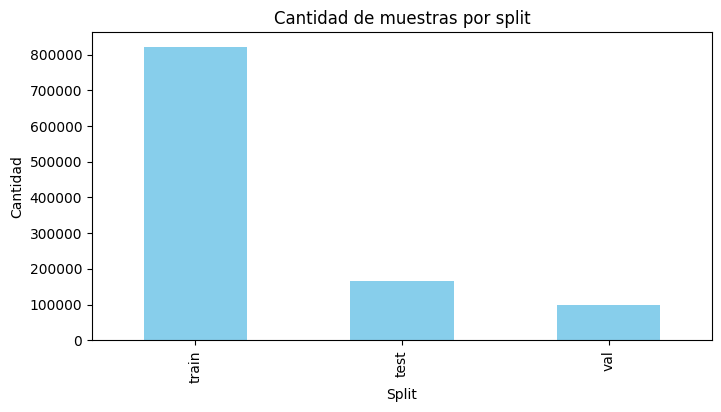

In [29]:
# Conteo de muestras por split
split_counts = df['split'].value_counts()
print('Cantidad de muestras por split:')
print(split_counts)

plt.figure(figsize=(8,4))
split_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de muestras por split')
plt.xlabel('Split')
plt.ylabel('Cantidad')
plt.show()

Clases disponibles: ['ok' 'take_picture' 'hand_heart' 'like' 'hand_heart2' 'stop' 'three3'
 'four' 'stop_inverted' 'no_gesture' 'point' 'grip' 'two_up_inverted'
 'dislike' 'one' 'middle_finger' 'little_finger' 'xsign' 'holy' 'two_up'
 'thumb_index2' 'fist' 'three' 'timeout' 'grabbing' 'peace'
 'peace_inverted' 'rock' 'mute' 'three_gun' 'palm' 'call' 'three2'
 'thumb_index']
label
thumb_index        46995
three3             40354
holy               39402
xsign              38586
middle_finger      38034
point              37679
three_gun          37543
grip               36406
grabbing           36352
little_finger      36301
mute               32349
rock               32182
hand_heart2        31986
one                31872
peace              31801
palm               31710
dislike            31624
fist               31543
four               31436
stop               31268
like               31244
ok                 31153
three              30721
two_up             30688
stop_inverted    

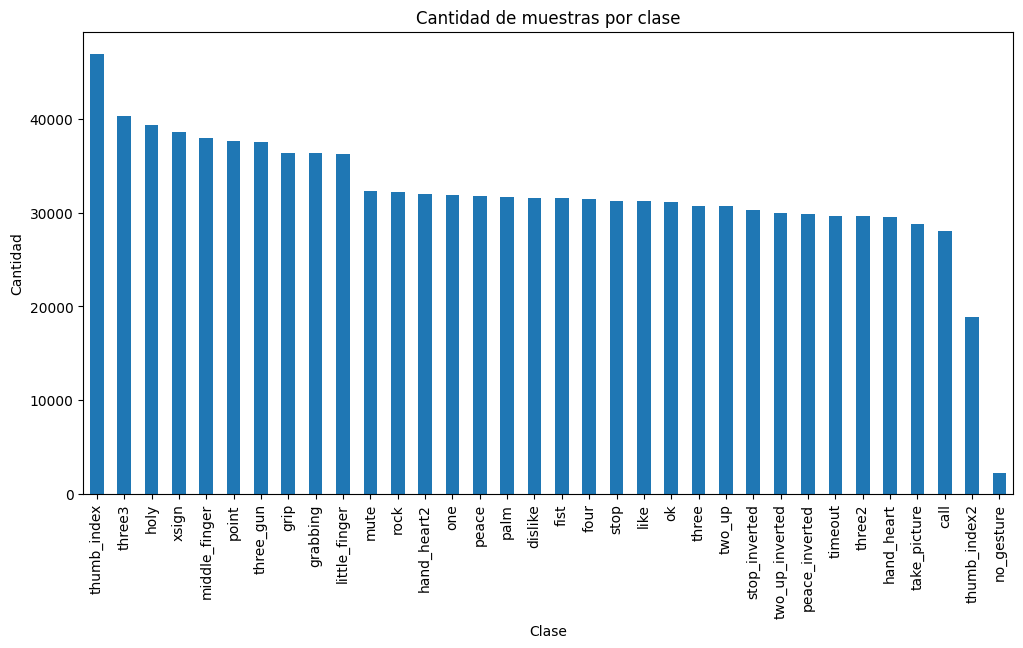

In [20]:
# Analizar las clases disponibles y su distribución usando el DataFrame completo
print('Clases disponibles:', df['label'].unique())

# Conteo de muestras por clase
class_counts = df['label'].value_counts()
print(class_counts)

# Visualizar la distribución
plt.figure(figsize=(12,6))
class_counts.plot(kind='bar')
plt.title('Cantidad de muestras por clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

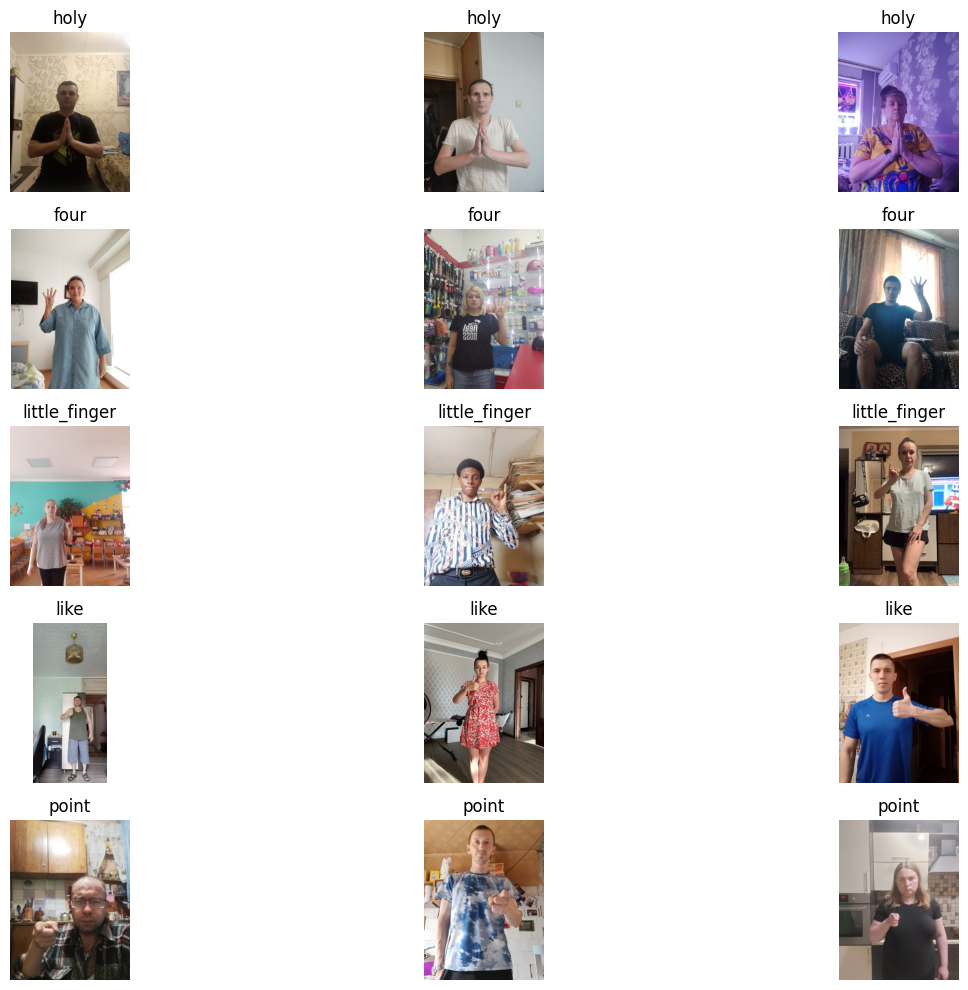

In [33]:
# Mostrar ejemplos visuales de algunas clases
import matplotlib.image as mpimg
import random
import os

num_classes = 5
num_images_per_class = 3
classes = random.sample(list(df['label'].unique()), num_classes)

plt.figure(figsize=(15, num_classes * 2))
for i, gesture in enumerate(classes):
    samples = df[df['label'] == gesture].sample(num_images_per_class)
    for j, img_path in enumerate(samples['image_path']):
        plt.subplot(num_classes, num_images_per_class, i * num_images_per_class + j + 1)
        if os.path.exists(img_path):
            try:
                img = mpimg.imread(img_path)
                plt.imshow(img)
                plt.title(f'{gesture}')
                plt.axis('off')
            except Exception as e:
                plt.text(0.5, 0.5, 'Error loading', ha='center', va='center')
                plt.axis('off')
        else:
            plt.text(0.5, 0.5, 'No image', ha='center', va='center')
            plt.axis('off')
plt.tight_layout()
plt.show()

## 5. Selección de gestos de interés
- Filtrar y mostrar información sobre los gestos relevantes para el proyecto: stop y gun

In [35]:
gestures_help = ['stop', 'three_gun']
df_help = df[df['label'].isin(gestures_help)]
print(f'Muestras de señales de ayuda: {len(df_help)}')
print(df_help['label'].value_counts())

Muestras de señales de ayuda: 68811
label
three_gun    37543
stop         31268
Name: count, dtype: int64


In [36]:
df_help.to_csv('../data/hagrid_help_dataframe.csv', index=False)

# Conlusiones y recomendaciones
- Resumir hallazgos importantes
- Sugerir pasos para el procesamiento y el entrenamiento